## Step 1: Importing the libraries

In [421]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Step 2: Read in and explore the data

In [422]:
#Importing the csv files
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

print(train.shape)

train.describe(include='all')

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Backstrom, Mr. Karl Alfred",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [423]:
print(train.columns) #Get a list of input features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [424]:
#train.head(5)
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.050,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.425,C86,C
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.500,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.000,B96 B98,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C


<br>
<b> Numerical features: </b> PassengerId, Age, SibSp, Fare <br>
<b> Categorical features: </b> Survived, Pclass, Sex, Embarked <br>
<b> String features: </b> Name, Ticket, Cabin

In [425]:
print(pd.isnull(train).sum())

#print(pd.isnull(train["Embarked"]).sum()) for individual features

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 3. Data Visualisation

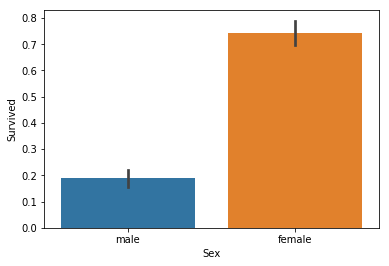

In [426]:
#Visualising the 'Sex' feature

sns.barplot(x="Sex",y="Survived",data=train)

In [427]:
print("Percentage of males who survived:", train["Survived"][train["Sex"]=='male'].value_counts(normalize=True)[1]*100)
print("Percentage of females who survived:", train["Survived"][train["Sex"]=='female'].value_counts(normalize=True)[1]*100)

Percentage of males who survived: 18.890814558058924
Percentage of females who survived: 74.20382165605095


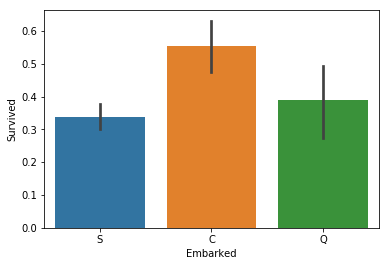

In [428]:
#Visualizing the 'Embarked' feature

sns.barplot(x="Embarked",y="Survived",data=train)

In [429]:
print("Percentage of S port passengers who survived",train["Survived"][train["Embarked"]=="S"].value_counts(normalize="True")[1]*100)
print("Percentage of C port passengers who survived",train["Survived"][train["Embarked"]=="C"].value_counts(normalize="True")[1]*100)
print("Percentage of Q port passengers who survived",train["Survived"][train["Embarked"]=="Q"].value_counts(normalize="True")[1]*100)

Percentage of S port passengers who survived 33.69565217391305
Percentage of C port passengers who survived 55.35714285714286
Percentage of Q port passengers who survived 38.961038961038966


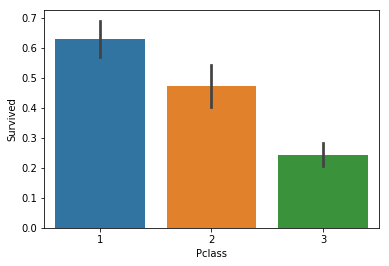

In [430]:
#Visualizing the 'Pclass' feature

sns.barplot(x="Pclass",y="Survived",data=train)

In [431]:
print("Percentage of Class 1 passengers who survived: ",train["Survived"][train["Pclass"]==1].value_counts(normalize="True")[1]*100)
print("Percentage of Class 2 passengers who survived: ",train["Survived"][train["Pclass"]==2].value_counts(normalize="True")[1]*100)
print("Percentage of Class 3 passengers who survived: ",train["Survived"][train["Pclass"]==3].value_counts(normalize="True")[1]*100)

Percentage of Class 1 passengers who survived:  62.96296296296296
Percentage of Class 2 passengers who survived:  47.28260869565217
Percentage of Class 3 passengers who survived:  24.236252545824847


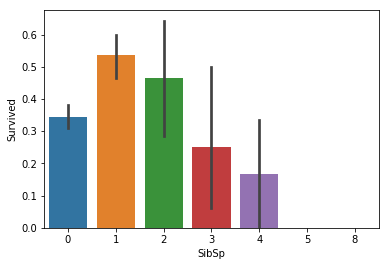

In [432]:
#Visualizing the 'SibSp' feauture

sns.barplot(x="SibSp",y="Survived",data=train)

In [433]:
print("Percentage of people with 0 companions who survived: ",train["Survived"][train["SibSp"]==0].value_counts(normalize="True")[1]*100)
print("Percentage of people with 1 companions who survived: ",train["Survived"][train["SibSp"]==1].value_counts(normalize="True")[1]*100)
print("Percentage of people with 2 companions who survived: ",train["Survived"][train["SibSp"]==2].value_counts(normalize="True")[1]*100)
print("Percentage of people with 3 companions who survived: ",train["Survived"][train["SibSp"]==3].value_counts(normalize="True")[1]*100)
print("Percentage of people with 4 companions who survived: ",train["Survived"][train["SibSp"]==4].value_counts(normalize="True")[1]*100)

Percentage of people with 0 companions who survived:  34.53947368421053
Percentage of people with 1 companions who survived:  53.588516746411486
Percentage of people with 2 companions who survived:  46.42857142857143
Percentage of people with 3 companions who survived:  25.0
Percentage of people with 4 companions who survived:  16.666666666666664


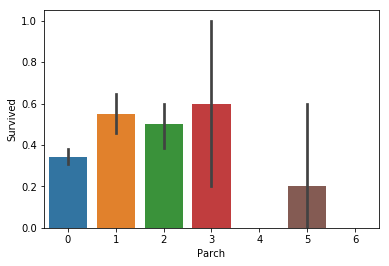

In [434]:
#Visualizing the 'Parch' feature

sns.barplot(x="Parch",y="Survived",data=train)

In [435]:
print("Percentage of people with 0 Parents/Children who survived: ",train["Survived"][train["Parch"]==0].value_counts(normalize="True")[1]*100)
print("Percentage of people with 1 Parents/Children who survived: ",train["Survived"][train["Parch"]==1].value_counts(normalize="True")[1]*100)
print("Percentage of people with 2 Parents/Children who survived: ",train["Survived"][train["Parch"]==2].value_counts(normalize="True")[1]*100)
print("Percentage of people with 3 Parents/Children who survived: ",train["Survived"][train["Parch"]==3].value_counts(normalize="True")[1]*100)
#print("Percentage of people with 4 Parents/Children who survived: ",train["Survived"][train["Parch"]==4].value_counts(normalize="True")[1]*100)
print("Percentage of people with 5 Parents/Children who survived: ",train["Survived"][train["Parch"]==5].value_counts(normalize="True")[1]*100)
#print("Percentage of people with 6 Parents/Children who survived: ",train["Survived"][train["Parch"]==6].value_counts(normalize="True")[1]*100)

Percentage of people with 0 Parents/Children who survived:  34.365781710914455
Percentage of people with 1 Parents/Children who survived:  55.08474576271186
Percentage of people with 2 Parents/Children who survived:  50.0
Percentage of people with 3 Parents/Children who survived:  60.0
Percentage of people with 5 Parents/Children who survived:  20.0


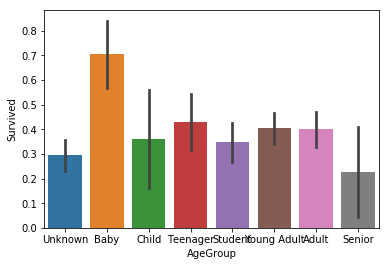

In [436]:
#Visualizing the 'Age' feature

#sns.barplot(x="Age",y="Survived",data=train)
train["Age"]=train["Age"].fillna(-0.5)
test["Age"]=test["Age"].fillna(-0.5)

bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Senior"]

train["AgeGroup"]=pd.cut(train["Age"], bins, labels=labels)
test["AgeGroup"]=pd.cut(test["Age"], bins, labels=labels)

sns.barplot(x="AgeGroup",y="Survived",data=train)

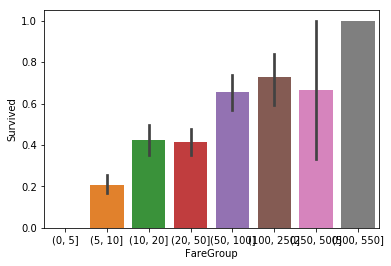

In [437]:
#Visualizing the 'Fare' feature

bins = [0,5,10,20,50,100,250,500,550]

train["FareGroup"]=pd.cut(train["Fare"],bins)
test["FareGroup"]=pd.cut(test["Fare"],bins)

sns.barplot(x="FareGroup",y="Survived",data=train)

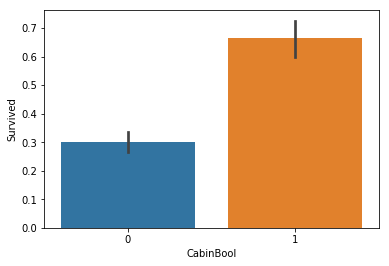

In [438]:
#Visualizing the 'Cabin' feature

train["CabinBool"]=train["Cabin"].notnull().astype('int')   #isnull would have the exact opposite result
test["CabinBool"]=test["Cabin"].notnull().astype('int')

sns.barplot(x="CabinBool",y="Survived",data=train)

In [439]:
print("Percentage of cabin owners who survived",train["Survived"][train["CabinBool"]==1].value_counts(normalize="True")[1]*100)
print("Percentage of non cabin owners who survived",train["Survived"][train["CabinBool"]==0].value_counts(normalize="True")[1]*100)

Percentage of cabin owners who survived 66.66666666666666
Percentage of non cabin owners who survived 29.985443959243085


<b> <b> A few observations up til now: </b> </b>
<ul>
    <li> Women were much more likely to survive</li>
    <li> Passengers with 'C' port of Embarkment were more likely to survive</li>
    <li> Higher class passengers were more likely to survive</li>
    <li> People going alone, without any companions were not that likely to survive as compared to those with one or two</li> 
    <li> Babies were more likely to survive than any other age group </li>
    <li> Cabin owners (Higher class) were more likely to survive </li>
    </ul>

## 4. Cleaning the data

In [440]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,415,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,8,NaN
top,NaN,NaN,"Midtsjo, Mr. Karl Albert",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,"(5, 10]",NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,152,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,NaN,0.000000


In [441]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
FareGroup        3
CabinBool        0
dtype: int64


In [442]:
#Let's go ahead and drop the cabin feature, as there's not a lot a information that we can extract from it

train = train.drop(['Cabin'], axis = 1)
test=test.drop(["Cabin"],axis=1)

In [443]:
#Let's drop the redundant feature 'CabinBool' too

train=train.drop(['CabinBool'],axis=1)
test=test.drop(['CabinBool'],axis=1)

In [444]:
#Let's go ahead and drop the ticket feature, since it's unlikely to give us any useful information

train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)

In [445]:
#Let's drop the name feature too

#train=train.drop(['Name'],axis=1)
#test=test.drop(['Name'],axis=1)

In [446]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,889,891,876
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,8,8
top,NaN,NaN,NaN,"Backstrom, Mr. Karl Alfred",male,NaN,NaN,NaN,NaN,S,Young Adult,"(5, 10]"
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644,220,319
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


In [447]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,417.000000,418,418,415
unique,NaN,NaN,418,2,NaN,NaN,NaN,NaN,3,8,8
top,NaN,NaN,"Midtsjo, Mr. Karl Albert",male,NaN,NaN,NaN,NaN,S,Young Adult,"(5, 10]"
freq,NaN,NaN,1,266,NaN,NaN,NaN,NaN,270,96,152
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,31.500000,NaN,NaN,NaN


In [448]:
#Embarked feature

print("Number of people Embarking in Southampton(S) = ",train[train["Embarked"]=="S"].shape[0])
print("Number of people Embarking in Cherbourg(C) = ",train[train["Embarked"]=="C"].shape[0])
print("Number of people Embarking in Queensland(Q) = ",train[train["Embarked"]=="Q"].shape[0])

#Majority of people have embarked in Southampton
train=train.fillna({"Embarked":"S"})

Number of people Embarking in Southampton(S) =  644
Number of people Embarking in Cherbourg(C) =  168
Number of people Embarking in Queensland(Q) =  77


In [449]:
#Age feature

combine = [train, test]

#print(combine[1])

for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
#pd.crosstab(train['Title'], train['Sex'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,"(5, 10]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,"(50, 100]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,"(5, 10]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,"(50, 100]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,"(5, 10]",Mr


In [450]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace(['Ms','Mlle'],'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [451]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,"(5, 10]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,"(50, 100]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,"(5, 10]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,"(50, 100]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,"(5, 10]",1


In [452]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup,Title
229,230,0,3,"Lefebre, Miss. Mathilde",female,-0.5,3,1,25.4667,S,Unknown,"(20, 50]",2
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,16.1000,S,Young Adult,"(10, 20]",1
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,7.5500,S,Student,"(5, 10]",2
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,29.7000,C,Adult,"(20, 50]",1
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,120.0000,S,Adult,"(100, 250]",3


In [453]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [454]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4,"(5, 10]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6,"(50, 100]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5,"(5, 10]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5,"(50, 100]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5,"(5, 10]",1


In [455]:
#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [456]:
#Let's drop the name feature too

train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

In [457]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup,Title
0,1,0,3,0,1,0,7.2500,S,4,"(5, 10]",1
1,2,1,1,1,1,0,71.2833,C,6,"(50, 100]",3
2,3,1,3,1,0,0,7.9250,S,5,"(5, 10]",2
3,4,1,1,1,1,0,53.1000,S,5,"(50, 100]",3
4,5,0,3,0,0,0,8.0500,S,5,"(5, 10]",1


In [458]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup,Title
0,1,0,3,0,1,0,7.2500,1,4,"(5, 10]",1
1,2,1,1,1,1,0,71.2833,2,6,"(50, 100]",3
2,3,1,3,1,0,0,7.9250,1,5,"(5, 10]",2
3,4,1,1,1,1,0,53.1000,1,5,"(50, 100]",3
4,5,0,3,0,0,0,8.0500,1,5,"(5, 10]",1


In [459]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [460]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup,Title,FareBand
0,1,0,3,0,1,0,1,4,"(5, 10]",1,1
1,2,1,1,1,1,0,2,6,"(50, 100]",3,4
2,3,1,3,1,0,0,1,5,"(5, 10]",2,2
3,4,1,1,1,1,0,1,5,"(50, 100]",3,4
4,5,0,3,0,0,0,1,5,"(5, 10]",1,2


In [461]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup,Title,FareBand
0,892,3,0,0,0,3,5,"(5, 10]",1,1
1,893,3,1,1,0,1,6,"(5, 10]",3,1
2,894,2,0,0,0,3,7,"(5, 10]",1,2
3,895,3,0,0,0,1,5,"(5, 10]",1,2
4,896,3,1,1,1,1,4,"(10, 20]",3,2


In [462]:
train=train.drop(['FareGroup'],axis=1)
test=test.drop(['FareGroup'],axis=1)

In [463]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
586,587,0,2,0,0,0,1,6,1,3
109,110,1,3,1,1,0,3,4,2,3
393,394,1,1,1,1,0,2,4,2,4
111,112,0,3,1,1,0,2,3,2,2
887,888,1,1,1,0,0,1,4,2,3


In [464]:
test.sample(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
63,955,3,1,0,0,3,4,2,1
107,999,3,0,0,0,3,5,1,1
118,1010,1,0,0,0,2,6,1,4
98,990,3,1,0,0,1,4,2,1
380,1272,3,0,0,0,3,5,1,1


## 5. Model fitting

In [465]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [467]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.74


In [470]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)